# Titre


# Desctiprtiond de la dataset

# Sommaire 

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
import os
from urllib import request
import sys
import datetime

%matplotlib inline
sns.set_style("darkgrid") 
sns.set_context("notebook")

In [2]:
FILE = Path('__file__').resolve()
ROOT = FILE.parents[0]  # DATA-SCUENCE-PROJECTS root directory
if ROOT.as_posix() not in sys.path:
    sys.path.append(ROOT.as_posix())  # add ROOT to PATH
# ROOT = ROOT.relative_to(Path.cwd())

## Get the Data
### Download the Data

In [3]:
FILE_NAME = "paris_housing.csv"
DATA_URL  = "https://www.data.gouv.fr/fr/datasets/r/d72d537a-2f7f-40af-bf1a-289ee25d5ae9"
SAVE_PATH = ROOT / "datasets"

def fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False):
    save_path =  Path(save_path)
    name, extension = os.path.splitext(file_name)
    save_path.mkdir(parents=True, exist_ok=True)
    date = datetime.datetime.now().strftime("%Y-%m-%d")
    try:
        request.urlretrieve(data_url, save_path / Path(name + (f'_{date}_' if add_date else "") + extension))
    except Exception as e:
        print(e)
        sys.exit()
    

In [4]:
fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False)

In [5]:
paris_housing = pd.read_csv(SAVE_PATH / FILE_NAME, sep=';')

In [6]:
paris_housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2021,11,71,Goutte-d'Or,1,1971-1990,non meublé,26.0,31.20,18.20,PARIS,7511871,"{""coordinates"": [[[2.349667597643656, 48.88373...","48.89213818760239,2.3555361632962777"
1,2021,10,55,Petit-Montrouge,4,1946-1970,meublé,22.7,27.24,15.89,PARIS,7511455,"{""coordinates"": [[[2.329136731859957, 48.83412...","48.826652625543865,2.3264369992248985"
2,2021,10,67,Batignolles,4,Apres 1990,meublé,26.6,31.92,18.62,PARIS,7511767,"{""coordinates"": [[[2.317210277038245, 48.89025...","48.88848151392056,2.313856169006362"
3,2021,14,76,Combat,1,1971-1990,meublé,26.3,31.56,18.41,PARIS,7511976,"{""coordinates"": [[[2.388343313526396, 48.88056...","48.878639075724855,2.3801272818292953"
4,2021,11,43,Roquette,2,1971-1990,non meublé,23.3,27.96,16.31,PARIS,7511143,"{""coordinates"": [[[2.379720818886926, 48.85344...","48.857064040831055,2.380364061726766"


In [7]:
paris_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                10240 non-null  int64  
 1   id_zone              10240 non-null  int64  
 2   id_quartier          10240 non-null  int64  
 3   nom_quartier         10240 non-null  object 
 4   piece                10240 non-null  int64  
 5   epoque               10240 non-null  object 
 6   meuble_txt           10240 non-null  object 
 7   ref                  10240 non-null  float64
 8   max                  10240 non-null  float64
 9   min                  10240 non-null  float64
 10  ville                10240 non-null  object 
 11  code_grand_quartier  10240 non-null  int64  
 12  geo_shape            10240 non-null  object 
 13  geo_point_2d         10240 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
# Variables Qualitatives
for col in paris_housing.select_dtypes('object'):
    print(f'========= {col} ==========')
    print(f'{paris_housing.loc[:, col].unique()} \n')

========= nom_quartier ==========
["Goutte-d'Or" 'Petit-Montrouge' 'Batignolles' 'Combat' 'Roquette'
 'Sainte-Marguerite' 'Sorbonne' 'Faubourg-du-Roule' 'Bel-Air'
 "St-Germain-l'Auxerrois" 'Bercy' 'Folie-Méricourt' 'Faubourg-Montmartre'
 'Porte-Saint-Denis' 'Auteuil' 'Europe' 'Madeleine' 'Montparnasse'
 'Saint-Merri' 'Enfants-Rouges' 'Muette' 'Saint-Vincent-de-Paul'
 'Vivienne' 'Rochechouart' 'Porte-Dauphine' 'Clignancourt' 'Halles'
 'Bonne-Nouvelle' 'Gaillon' 'Hôpital-Saint-Louis' 'Mail' 'Charonne'
 'Saint-Georges' 'Plaisance' 'Maison-Blanche' 'Salpêtrière'
 'Jardin-des-Plantes' "Saint-Thomas-d'Aquin" 'Amérique' 'Monnaie'
 'Ecole-Militaire' 'Saint-Gervais' 'Père-Lachaise' 'Chaillot' 'Archives'
 'Notre-Dame-des-Champs' 'Croulebarbe' 'Ternes' 'Saint-Fargeau'
 "Chaussée-d'Antin" 'Gros-Caillou' 'Pont-de-Flandre' 'Invalides'
 'Champs-Elysées' 'Belleville' 'Gare' 'Saint-Lambert' 'Arts-et-Metiers'
 'Odeon' 'Picpus' 'Arsenal' 'Grenelle' 'Sainte-Avoie'
 'Saint-Germain-des-Prés' 'Val-de-Grace' 

In [9]:
for col in paris_housing.select_dtypes('object'):
    print(f'========= {col} ==========')
    print(paris_housing.loc[:, col].value_counts(), '\n')

========= nom_quartier ==========
Saint-Georges            128
Gros-Caillou             128
Val-de-Grace             128
Arts-et-Metiers          128
Saint-Vincent-de-Paul    128
                        ... 
Javel 15Art              128
Parc-de-Montsouris       128
Plaisance                128
Grenelle                 128
Saint-Gervais            128
Name: nom_quartier, Length: 80, dtype: int64 

========= epoque ==========
1946-1970     2560
1971-1990     2560
Avant 1946    2560
Apres 1990    2560
Name: epoque, dtype: int64 

========= meuble_txt ==========
non meublé    5120
meublé        5120
Name: meuble_txt, dtype: int64 

========= ville ==========
PARIS    10240
Name: ville, dtype: int64 

========= geo_shape ==========
{"coordinates": [[[2.3392285502760473, 48.87679269118237], [2.338156525248434, 48.876861410361606], [2.337099204567835, 48.876714200619205], [2.335450084489445, 48.8768304912102], [2.334339473663466, 48.87691374711932], [2.332807360032859, 48.87684305482689], [2.

In [9]:
paris_housing.describe()

,annee,id_zone,id_quartier,piece,ref,max,min,code_grand_quartier
count,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,1.024000e+04
mean,2020.500000,6.662500,40.500000,2.500000,25.829805,30.996164,18.082487,7.511090e+06
std,1.118089,4.224966,23.093334,1.118089,4.202257,5.042818,2.941352,5.997236e+02
min,2019.000000,1.000000,1.000000,1.000000,14.300000,17.160000,10.010000,7.510101e+06
25%,2019.750000,3.000000,20.750000,1.750000,23.000000,27.600000,16.100000,7.510596e+06
50%,2020.500000,5.000000,40.500000,2.500000,25.500000,30.600000,17.850000,7.511090e+06
75%,2021.250000,11.000000,60.250000,3.250000,28.500000,34.200000,19.950000,7.511585e+06
max,2022.000000,14.000000,80.000000,4.000000,39.600000,47.520000,27.720000,7.512080e+06


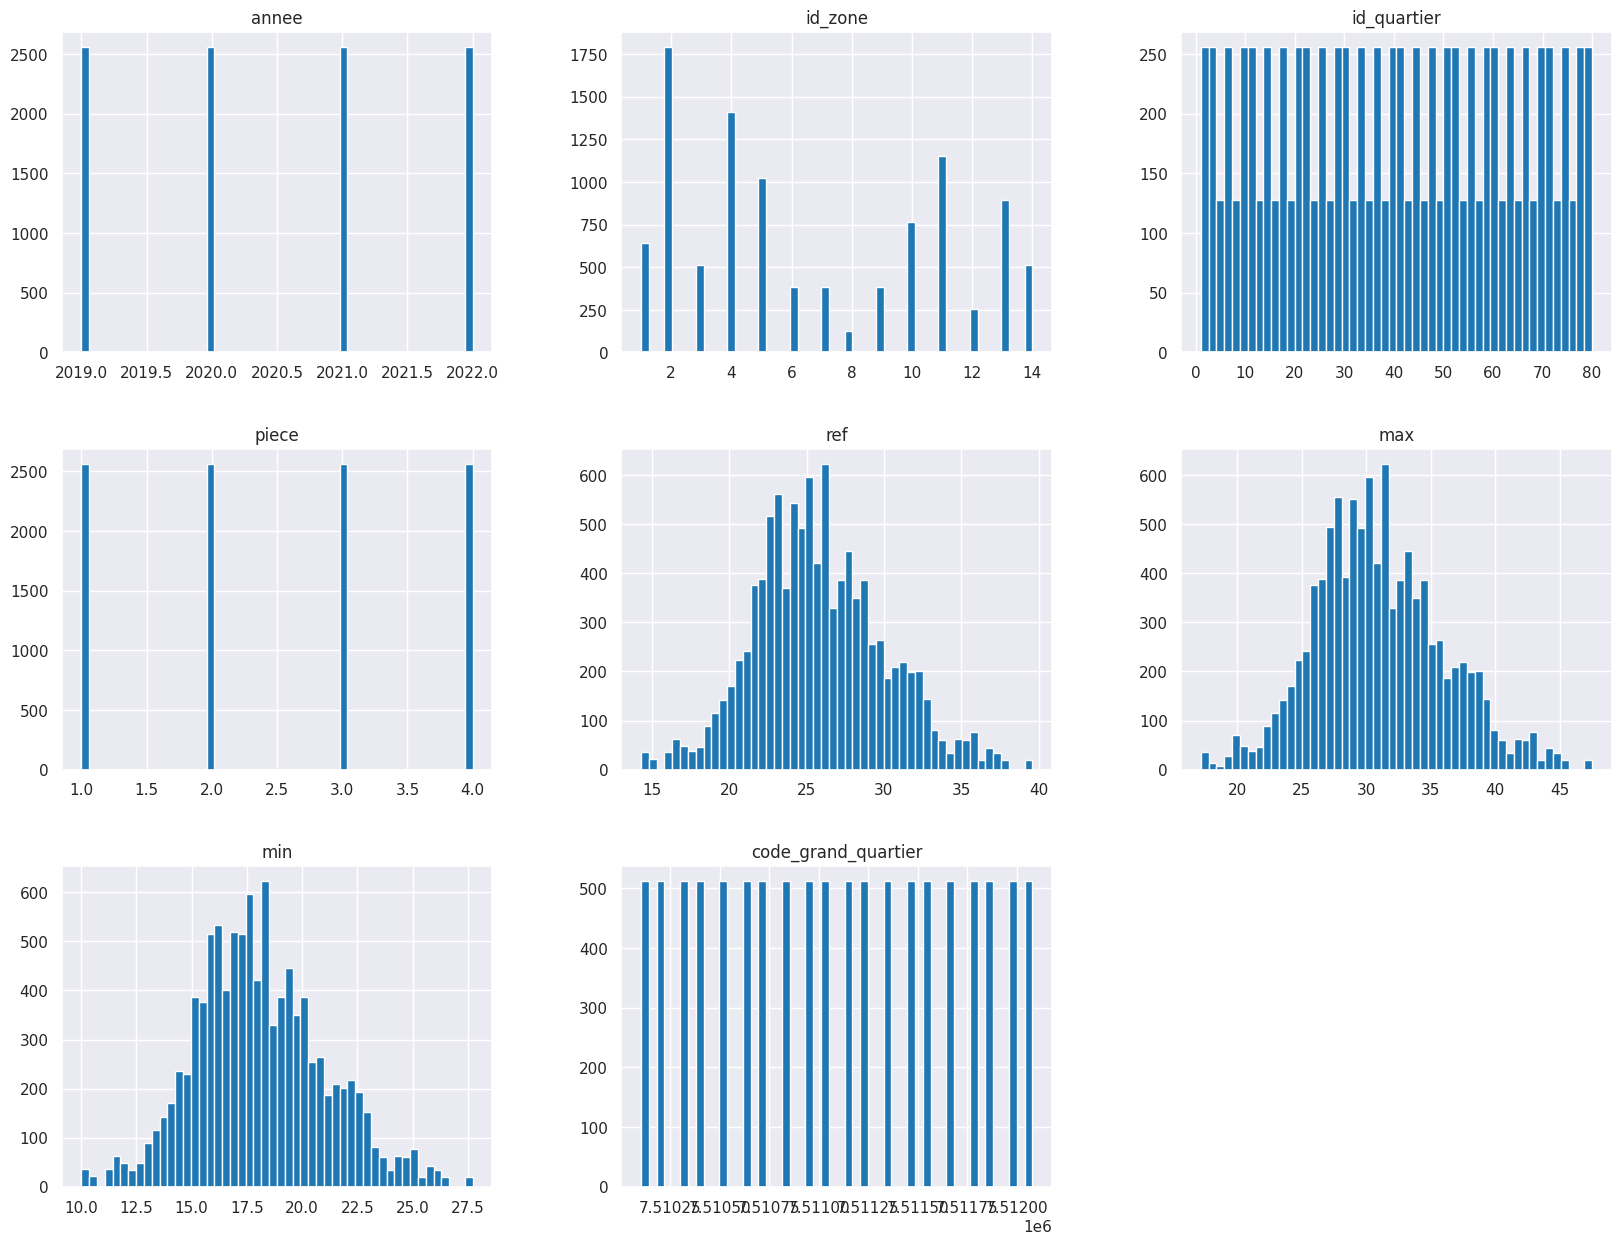

In [11]:
paris_housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Create a Test Set


In [50]:
from zlib import crc32

def test_set_check(id, test_rat):
    assert 0 <= test_rat <= 100, 'The rate of the parameter "test_rat" must be between [0, 100].'
    test_rat = test_rat if 0 <= test_rat <= 1 else test_rat/100
    return crc32(np.int64(id)) & 0xffffffff < test_rat * 2**32
    # return bytearray(hash(np.int64(id)).digest())[-1] < 256 * test_rat

def split_train_test(data, test_rat, by=None):
    data, by = (data.reset_index(), 'index') if by==None else (data, by) # adds an `index` column
    in_test_set = data[by].apply(lambda id_: test_set_check(id_, test_rat))
    return data.loc[~in_test_set, :], data.loc[in_test_set, :]

In [51]:
train_set, test_set = split_train_test(data=paris_housing, test_rat=0.2, by=None)
train_set.shape, test_set.shape

((8192, 16), (2048, 16))

max ref:  39.6 min ref:  14.4


<Axes: >

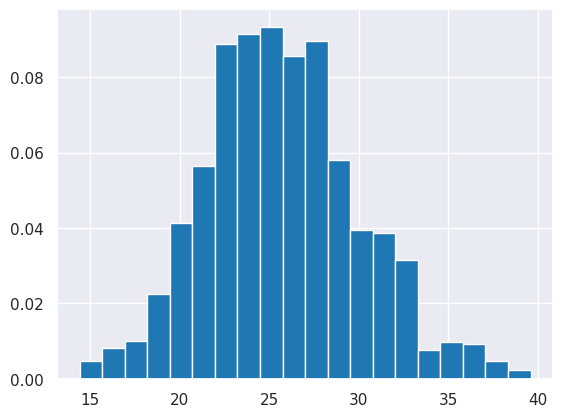

In [52]:
print('max ref: ', test_set.ref.max(), 'min ref: ', test_set.ref.min())
test_set.ref.hist(bins=20,  density=True)

In [53]:
paris_housing['ref_cat'] = pd.cut(paris_housing['ref'],
                                  bins=[10., 15., 20., 25., 30., 35, 40, np.inf],
                                  labels=[1, 2, 3, 4, 5, 6, 7])

In [41]:
paris_housing.ref_cat.value_counts(ascending=True)

ref_cat
7       0
1      42
6     271
2     635
5    1369
3    3950
4    3973
Name: count, dtype: int64

<Axes: >

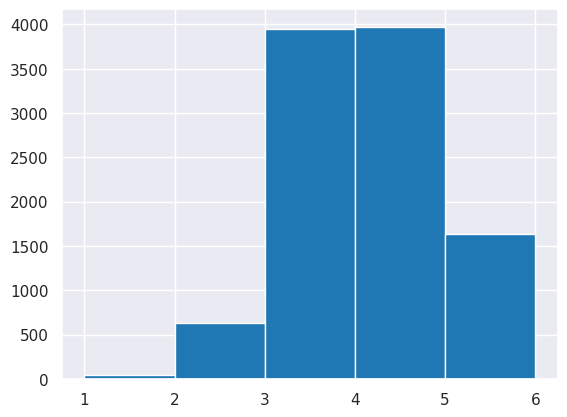

In [54]:
paris_housing.ref_cat.hist(bins=5)

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_shuffle_split.split(paris_housing, paris_housing['ref_cat']):
    strat_train_set = paris_housing.loc[train_index]
    strat_test_set = paris_housing.loc[test_index]

In [56]:
strat_train_set.shape, strat_test_set.shape

((8192, 15), (2048, 15))

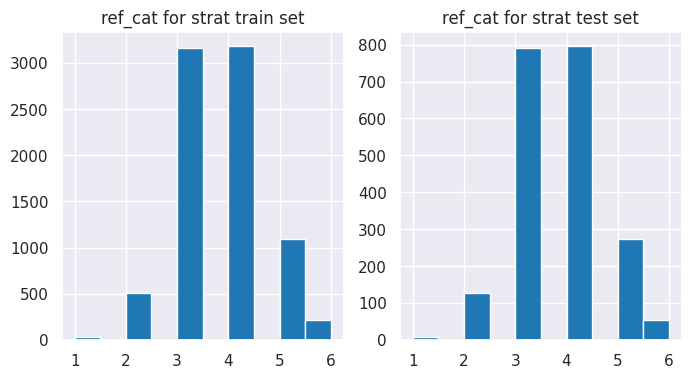

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titels = ['ref_cat for strat train set', 
          'ref_cat for strat test set']
for titel, ax, set_ in zip(titels, axes.flatten(), [strat_train_set, strat_test_set]):
    ax.hist(set_['ref_cat'])
    ax.set_title(titel)

In [21]:
compare_props = pd.DataFrame({
    "strat train set": strat_train_set.ref_cat.value_counts() / len(strat_train_set),
    "strat test set": strat_test_set.ref_cat.value_counts() / len(strat_test_set),
    },
    index=strat_test_set.ref_cat.unique().sort_values()
    ).sort_index()

compare_props.head(5)

,strat train set,strat test set
1,0.004150,0.003906
2,0.062012,0.062012
3,0.385742,0.385742
4,0.387939,0.388184
5,0.133667,0.133789


In [60]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('ref_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights


In [80]:
strat_train_set = strat_train_set.assign(pays='FRANCE')
housing = strat_train_set.copy()

## Visualizing Geographical Data

In [81]:
housing['longitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[0]))
housing['latitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[1]))

housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,pays,longitude,latitude
2934,2019,5,35,Faubourg-Montmartre,3,Avant 1946,non meublé,22.4,26.90,15.70,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341",FRANCE,48.873935,2.343253
733,2020,2,13,Saint-Merri,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510413,"{""coordinates"": [[[2.352623485962105, 48.85490...","48.858521372323814,2.3516669671389723",FRANCE,48.858521,2.351667
315,2022,13,80,Charonne,3,1946-1970,meublé,19.2,23.04,13.44,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303535,2.407430328235971",FRANCE,48.854760,2.407430
138,2019,4,14,Saint-Gervais,2,Avant 1946,non meublé,27.3,32.80,19.10,PARIS,7510414,"{""coordinates"": [[[2.363764600226478, 48.85567...","48.85571865089276,2.35816233385277",FRANCE,48.855719,2.358162
9928,2020,11,43,Roquette,4,1946-1970,meublé,24.4,29.28,17.08,PARIS,7511143,"{""coordinates"": [[[2.379720818886926, 48.85344...","48.857064040831055,2.380364061726766",FRANCE,48.857064,2.380364


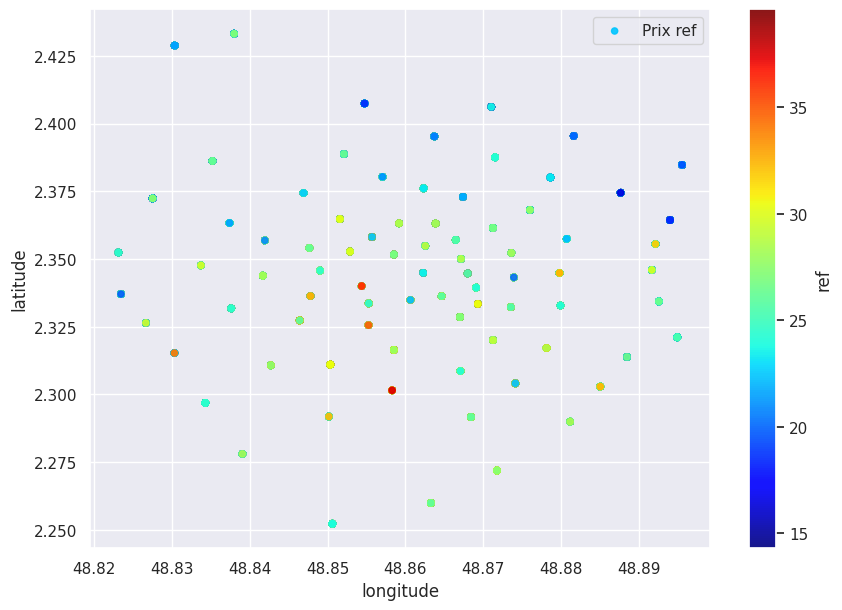

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9,
             s=None, label="Prix ref", figsize=(10,7),
             c="ref", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=True)
plt.legend()

In [78]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely.geometry
import json
#from geodatasets import get_path

In [83]:
housing = housing.assign(pays='FRANCE')
housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,pays,longitude,latitude
2934,2019,5,35,Faubourg-Montmartre,3,Avant 1946,non meublé,22.4,26.90,15.70,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341",FRANCE,48.873935,2.343253
733,2020,2,13,Saint-Merri,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510413,"{""coordinates"": [[[2.352623485962105, 48.85490...","48.858521372323814,2.3516669671389723",FRANCE,48.858521,2.351667
315,2022,13,80,Charonne,3,1946-1970,meublé,19.2,23.04,13.44,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303535,2.407430328235971",FRANCE,48.854760,2.407430
138,2019,4,14,Saint-Gervais,2,Avant 1946,non meublé,27.3,32.80,19.10,PARIS,7510414,"{""coordinates"": [[[2.363764600226478, 48.85567...","48.85571865089276,2.35816233385277",FRANCE,48.855719,2.358162
9928,2020,11,43,Roquette,4,1946-1970,meublé,24.4,29.28,17.08,PARIS,7511143,"{""coordinates"": [[[2.379720818886926, 48.85344...","48.857064040831055,2.380364061726766",FRANCE,48.857064,2.380364


In [84]:
housing['geo_shape_json'] = housing['geo_shape'].apply(json.loads) 
housing.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,pays,longitude,latitude,geo_shape_json
2934,2019,5,35,Faubourg-Montmartre,3,Avant 1946,non meublé,22.4,26.90,15.70,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341",FRANCE,48.873935,2.343253,"{'coordinates': [[[2.340255299125085, 48.87660..."
733,2020,2,13,Saint-Merri,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510413,"{""coordinates"": [[[2.352623485962105, 48.85490...","48.858521372323814,2.3516669671389723",FRANCE,48.858521,2.351667,"{'coordinates': [[[2.352623485962105, 48.85490..."
315,2022,13,80,Charonne,3,1946-1970,meublé,19.2,23.04,13.44,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303535,2.407430328235971",FRANCE,48.854760,2.407430,"{'coordinates': [[[2.4160210576126833, 48.8467..."
138,2019,4,14,Saint-Gervais,2,Avant 1946,non meublé,27.3,32.80,19.10,PARIS,7510414,"{""coordinates"": [[[2.363764600226478, 48.85567...","48.85571865089276,2.35816233385277",FRANCE,48.855719,2.358162,"{'coordinates': [[[2.363764600226478, 48.85567..."
9928,2020,11,43,Roquette,4,1946-1970,meublé,24.4,29.28,17.08,PARIS,7511143,"{""coordinates"": [[[2.379720818886926, 48.85344...","48.857064040831055,2.380364061726766",FRANCE,48.857064,2.380364,"{'coordinates': [[[2.379720818886926, 48.85344..."


In [85]:
gdf =  geopandas.GeoDataFrame(
    housing, 
    # geometry = geopandas.points_from_xy(housing.longitude, housing.latitude), crs="EPSG:4326",
    # polygone = housing.geo_shape_json.apply(shapely.geometry.shape)
    geometry = housing.geo_shape_json.apply(shapely.geometry.shape), 
    crs="EPSG:4326"
)
# polygone = geopandas.GeoSeries(shapely.geometry.shape(housing[housing.geo_shape_json.notnull()]))

In [87]:
gdf["area"] = gdf.area
gdf["area"]


/tmp/ipykernel_13624/2714091422.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


2934    0.000051
733     0.000038
315     0.000256
138     0.000052
9928    0.000144
          ...   
9910    0.000088
3559    0.000088
2765    0.000291
744     0.000132
6028    0.000089
Name: area, Length: 8192, dtype: float64

In [89]:
gdf.head()

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,pays,longitude,latitude,geo_shape_json,geometry,area
2934,2019,5,35,Faubourg-Montmartre,3,Avant 1946,non meublé,22.4,26.90,15.70,PARIS,7510935,"{""coordinates"": [[[2.340255299125085, 48.87660...","48.873934691758095,2.343252579473341",FRANCE,48.873935,2.343253,"{'coordinates': [[[2.340255299125085, 48.87660...","POLYGON ((2.34026 48.87660, 2.34228 48.87651, ...",0.000051
733,2020,2,13,Saint-Merri,3,1946-1970,meublé,24.5,29.40,17.15,PARIS,7510413,"{""coordinates"": [[[2.352623485962105, 48.85490...","48.858521372323814,2.3516669671389723",FRANCE,48.858521,2.351667,"{'coordinates': [[[2.352623485962105, 48.85490...","POLYGON ((2.35262 48.85491, 2.35249 48.85467, ...",0.000038
315,2022,13,80,Charonne,3,1946-1970,meublé,19.2,23.04,13.44,PARIS,7512080,"{""coordinates"": [[[2.4160210576126833, 48.8467...","48.85476028303535,2.407430328235971",FRANCE,48.854760,2.407430,"{'coordinates': [[[2.4160210576126833, 48.8467...","POLYGON ((2.41602 48.84675, 2.41599 48.84661, ...",0.000256
138,2019,4,14,Saint-Gervais,2,Avant 1946,non meublé,27.3,32.80,19.10,PARIS,7510414,"{""coordinates"": [[[2.363764600226478, 48.85567...","48.85571865089276,2.35816233385277",FRANCE,48.855719,2.358162,"{'coordinates': [[[2.363764600226478, 48.85567...","POLYGON ((2.36376 48.85568, 2.36294 48.85456, ...",0.000052
9928,2020,11,43,Roquette,4,1946-1970,meublé,24.4,29.28,17.08,PARIS,7511143,"{""coordinates"": [[[2.379720818886926, 48.85344...","48.857064040831055,2.380364061726766",FRANCE,48.857064,2.380364,"{'coordinates': [[[2.379720818886926, 48.85344...","POLYGON ((2.37972 48.85344, 2.37937 48.85339, ...",0.000144


In [90]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

/tmp/ipykernel_13624/2143033591.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


2934    POINT (2.34325 48.87393)
733     POINT (2.35167 48.85852)
315     POINT (2.40743 48.85476)
138     POINT (2.35816 48.85572)
9928    POINT (2.38036 48.85706)
                  ...           
9910    POINT (2.33285 48.87993)
3559    POINT (2.33634 48.84780)
2765    POINT (2.38478 48.89556)
744     POINT (2.31644 48.85851)
6028    POINT (2.37296 48.86740)
Name: centroid, Length: 8192, dtype: geometry

In [32]:
df_location = housing.loc[:, ['ville', 'pays', 'latitude', 'longitude', 'geo_shape']]
df_location.head(5)

,ville,pays,latitude,longitude,geo_shape
2950,PARIS,FRANCE,2.334910,48.860650,"{""coordinates"": [[[2.344593389828428, 48.85404..."
763,PARIS,FRANCE,2.355536,48.892138,"{""coordinates"": [[[2.349667597643656, 48.88373..."
161,PARIS,FRANCE,2.374468,48.887661,"{""coordinates"": [[[2.370498649617153, 48.87819..."
189,PARIS,FRANCE,2.350080,48.867150,"{""coordinates"": [[[2.351518483670822, 48.86442..."
9925,PARIS,FRANCE,2.315305,48.830317,"{""coordinates"": [[[2.321133015885315, 48.83990..."


<Axes: >

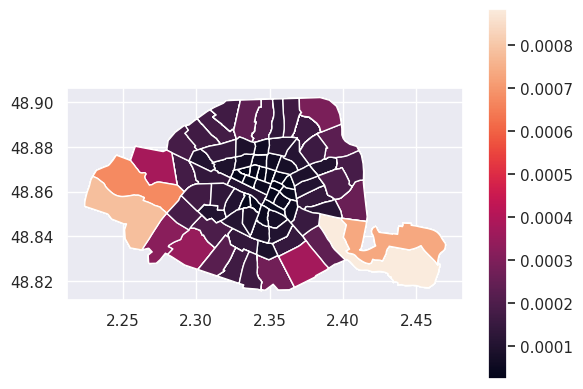

In [88]:
gdf.plot("area", legend=True, )

Text(0.5, 1.0, 'map de paris')

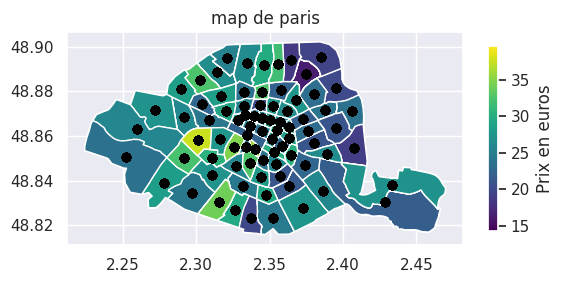

In [118]:
ax = gdf.plot(column="ref", cmap='viridis', legend=True, 
              legend_kwds={'shrink': 0.5, # réduire la taille de la barre de couleur
                           'label': 'Prix en euros', # ajouter un titre à la barre de couleur
                           'format': '%.0f'}) # formater les valeurs de la barre de couleur)

gdf['centroid'].plot(ax=ax, color="black", alpha=0.1)
ax.set_title('map de paris')

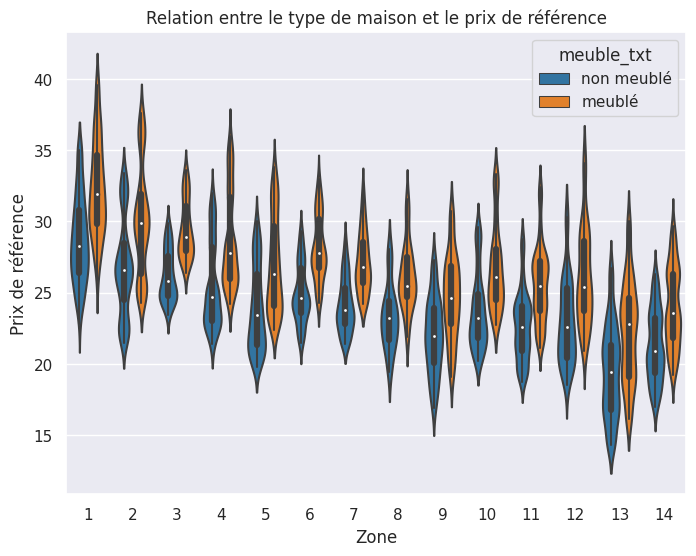

In [125]:
import seaborn as sns

plt.figure(figsize=(8, 15))
sns.violinplot(x="id_zone", y="ref", hue="meuble_txt", data=gdf)
plt.xlabel("Zone")
plt.ylabel("Prix de référence")
plt.title("Relation entre le type de maison et le prix de référence")
plt.show()
